In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import Lasso, Ridge, LinearRegression as LR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, explained_variance_score as EVS, mean_squared_error as MSE


data = pd.read_csv('8.Advertising.csv')    # TV、Radio、Newspaper、Sales
x = data[['TV', 'Radio', 'Newspaper']]
# x = data[['TV', 'Radio']]
y = data['Sales']

In [2]:
x.shape

(200, 3)

In [3]:
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [4]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x_train.shape

(160, 3)

In [6]:
reg = LR().fit(x_train, y_train)
yhat = reg.predict(x_test)
yhat

array([21.73577184, 16.45693776,  7.65993185, 17.89202679, 18.67730671,
       23.86271904, 16.33623628, 13.45649226,  9.177296  , 17.36056228,
       14.4677995 ,  9.85697601, 17.26057027, 16.71866935, 15.09530285,
       15.58923732, 12.45188167, 17.27925151, 11.0944114 , 18.06889853,
        9.33433055, 12.91345761,  8.7842804 , 10.46670654, 11.40303174,
       15.03104665,  9.78479388, 19.46028647, 18.22954934, 17.1958903 ,
       21.60304218, 14.71901407, 16.29205532, 12.36432281, 19.98831261,
       15.37556411, 13.96678297, 10.06809496, 20.97197274,  7.45877832])

In [7]:
print(reg.coef_)
print(reg.intercept_)
#y=2.908+ 0.047*TV+ 0.179*Radio+ 0.003*Newspaper

[0.0468431  0.17854434 0.00258619]
2.907947020816433


In [8]:
MSE(y_test, yhat)

1.9918855518287906

In [9]:
np.sqrt(MSE(y_test, yhat))/y_test.mean()

0.09492798088839138

In [10]:
-cross_val_score(reg, x,y,cv=5, scoring="neg_mean_squared_error")

array([3.1365399 , 2.42566776, 1.58522508, 5.42615506, 2.79114519])

In [11]:
cross_val_score(reg,x,y, cv=5,scoring="r2").mean()

0.8871063495438436

In [12]:
r2_score(yhat,y_test)

0.8832957189120244

In [13]:
r2_score(y_test, yhat)   
#一定要注意顺序，也可以使用r2_score(y_true = y_test, y_pred = yhat),这样可以完全避免r2_score和reg.score不同的情况

0.8927605914615384

In [14]:
r2 = reg.score(x_test,y_test)
r2

0.8927605914615384

In [15]:
EVS(y_test,yhat)

0.8928098235696608

In [16]:
cross_val_score(reg,x,y,cv=5,scoring="explained_variance").mean()

0.8924114066793429

In [17]:
x.columns

Index(['TV', 'Radio', 'Newspaper'], dtype='object')

**多元非线性回归**

**PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)**

**参数说明:**

**degree=2,表示多项式的变化维度为2，即^2**

**interaction_only表示是否只使用a*b，默认为 False**

**include_bias是否添加一列全部等于1的偏置项**

eg. PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)，就是对特征数据进行多项式转化，但特征为a与b时，相当于多出来了3个特征即a^2, a*b, b^2 

In [18]:
from sklearn.preprocessing import PolynomialFeatures   #StandardScaler

#degree 表示多项式的维度，即^2， interaction_only表示是否仅使用a*b, include_bias表示是否添加一列全部等于1的偏置项
po = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
x_poly = po.fit_transform(x)
pd.DataFrame(x_poly).head()

,0,1,2,3,4,5,6,7,8
0,230.1,37.8,69.2,52946.01,8697.78,15922.92,1428.84,2615.76,4788.64
1,44.5,39.3,45.1,1980.25,1748.85,2006.95,1544.49,1772.43,2034.01
2,17.2,45.9,69.3,295.84,789.48,1191.96,2106.81,3180.87,4802.49
3,151.5,41.3,58.5,22952.25,6256.95,8862.75,1705.69,2416.05,3422.25
4,180.8,10.8,58.4,32688.64,1952.64,10558.72,116.64,630.72,3410.56


In [19]:
# 使用pd.DataFrame将数据转换为pd格式
x_poly = pd.DataFrame(x_poly, 
                      columns=['TV', 'Radio', 'Newspaper', 'TV^2', 'TV_Radio', 'TV_News', 'Radio^2', 'Radio_News', 'News^2'])
x_poly.head()

,TV,Radio,Newspaper,TV^2,TV_Radio,TV_News,Radio^2,Radio_News,News^2
0,230.1,37.8,69.2,52946.01,8697.78,15922.92,1428.84,2615.76,4788.64
1,44.5,39.3,45.1,1980.25,1748.85,2006.95,1544.49,1772.43,2034.01
2,17.2,45.9,69.3,295.84,789.48,1191.96,2106.81,3180.87,4802.49
3,151.5,41.3,58.5,22952.25,6256.95,8862.75,1705.69,2416.05,3422.25
4,180.8,10.8,58.4,32688.64,1952.64,10558.72,116.64,630.72,3410.56


In [20]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_poly, y, test_size=0.2, random_state=1)

In [21]:
reg2 = LR().fit(x_train2, y_train2)
yhat2 = reg2.predict(x_test2)
yhat2

array([24.0997499 , 16.57292734,  9.21526371, 14.0757725 , 17.47080739,
       24.9872432 , 17.29597402, 13.41135524, 10.05247531, 17.3492023 ,
       15.06303554, 10.22243833, 17.40044869, 16.87140416, 13.36207704,
       16.5053683 , 13.23115591, 12.04055116,  8.34500145, 18.71451918,
       10.43160256, 13.16714134,  7.9252826 , 11.36865367, 12.28393907,
       15.12992011,  9.20847543, 19.1699663 , 19.5813793 , 15.883991  ,
       23.25985695, 12.21470254, 17.21216436, 12.41496974, 20.11730255,
       15.6946992 , 12.00058669, 11.00100624, 22.85693936,  6.92267035])

In [22]:
print(reg2.coef_)
print(reg2.intercept_)

[ 5.44789527e-02  1.70437621e-02  9.68390154e-03 -1.18664857e-04
  1.12349240e-03 -5.99683917e-05  1.87915100e-04 -1.87139022e-05
  7.01990051e-05]
4.880821075940215


In [23]:
np.sqrt(MSE(y_test2,yhat2))/y_test2.mean()

0.032380138982690376

In [24]:
cross_val_score(reg,x_poly,y, cv=5,scoring="r2").mean()

0.98425409815801

In [25]:
cross_val_score(reg,x_poly,y, cv=5,scoring="explained_variance").mean()

0.98440792918983

**网格搜索（自带交叉验证）**

**GridSearchCV(classifier/regressor, param_grid={}, cv= )**

In [26]:
model = Lasso()
# model = Ridge()

alpha_can = np.logspace(-3, 2, 10) 
lasso_model = GridSearchCV(model, param_grid={'alpha': alpha_can}, cv=5)   #实例化
lasso_model.fit(x, y)                                          #使用训练数据训练模型
print ('最优参数：\n', lasso_model.best_params_)                             #最有参数

最优参数：
 {'alpha': 2.1544346900318843}


In [27]:
y_hat = lasso_model.predict(np.array(x_test))
mse = np.average((y_hat - np.array(y_test)) ** 2)  # Mean Squared Error
rmse = np.sqrt(mse)                                # Root Mean Squared Error
print ('mse:%s'%mse)
print ('rmse:%s'%rmse)

mse:1.895304875796198
rmse:1.3767007212158342


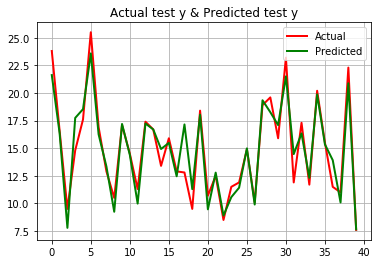

In [28]:
#可视化
t = np.arange(len(x_test))
plt.plot(t, y_test, 'r-', linewidth=2, label='Actual')
plt.plot(t, y_hat, 'g-', linewidth=2, label='Predicted')
plt.title('Actual test y & Predicted test y')
plt.legend(loc='upper right')
plt.grid()
plt.show()